### Ruben Abbou
## Simpson's rule approximation

Computes a reliable approximation of the integral of a given function using Simpson's rule and adaptivity.

$$ \int_c^df(x)dx \approx \left(f(c) + 4f\left(\frac{c+d}{2}\right) + f(d) \right) \cdot \frac{d - c}{6} $$

In [1]:
from numpy import log, array, sin, sqrt, pi
import matplotlib.pyplot as plt

# global variables
minLevel = 4
maxLevel = 30

In [2]:
def simpsons_rule_approx(f, a, b, TOL, level=0, fa=None, fb=None, fc=None):
    '''
    Calculates a Simpson's rule approx for the integral of f on [a, b]
    inputs:
        - f: function to evaluate
        - a, b: interval
        - TOL: tolerance
        - level: level of depth
        - fa, fb, fc: reuses of function evaluations for optimization
    outputs:
        - approx (float): approximation of the integral
        - evals (int): number of evaluations of f required for this estimation
        - intervals (list of tuples): each "good" interval
    '''
    c = (a+b)/2
    #initiate the number of evaluations of f(x)
    evals = 0
    if not (fa and fb and fc):
        fa, fb, fc = f(a), f(b), f(c)
        evals += 3

    # evaluate coarse approximation
    coarse_approx = (fa + 4*fc + fb) * (b-a) / 6
    
    # evaluate fine approximation
    flc = f((a+c)/2)
    frc = f((c+b)/2)
    fine_approx = ((fa + 4*flc + fc) * (c-a) + (fc + 4*frc + fb) * (b-c)) / 6
    evals += 2
    
    intervals = []
    if (level >= minLevel and abs(fine_approx-coarse_approx) <= 15*TOL) or (level >= maxLevel):
        # good approximation, return
        intervals.append((a, b))
        return fine_approx, evals, intervals
    else:
        # estimate each
        s1, evals1, i1 = simpsons_rule_approx(f, a, c, TOL/2, level+1, fa, fc, flc)
        s2, evals2, i2 = simpsons_rule_approx(f, c, b, TOL/2, level+1, fc, fb, frc)
        evals += evals1 + evals2
        intervals += i1 + i2
        return s1+s2, evals, intervals


def make_plots(f, a, b, TOLs=[1e-2, 1e-4, 1e-6]):
    '''
    draws the required plots
    inputs:
        - f: function to evaluate
        - a, b: interval
        - TOLs: list of tolerances
    '''
    approxs = []
    evalss = []
    intervals = []
    for TOL in TOLs:
        approx, evals, inter = simpsons_rule_approx(f, a, b, TOL, level=0)
        approxs.append(approx)
        evalss.append(evals)
        if TOL == 1e-4:
            intervals += inter

    plt.figure(figsize=(18,5))

    plt.subplot(1, 3, 1)
    logtols = log(1/array(TOLs))
    logevals = log(evalss)
    plt.plot(logtols, logevals, 'r')
    plt.title(r'# of evaluations of $f(x)$ plot', size=15)
    plt.ylabel(r'$\log(\#\ f(x)\ \mathrm{evaluations})$', size=13)
    plt.xlabel(r'$\log(1/\mathrm{tolerance})$', size=13)
    
    plt.subplot(1, 3, 2)
    # an approximation with tol=1e-9 is considered as the 'true value'
    true_val, _, _ = simpsons_rule_approx(f, a, b, 1e-9, level=0)
    log_error = [log(1/abs(array(ap) - true_val)) if abs(array(ap) - true_val) else 10 for ap in approxs]
    plt.plot(logtols, log_error, 'g')
    plt.title("Error plot", size=15)
    plt.ylabel(r'$\log(1/|\mathrm{actual error}|)$', size=13)
    plt.xlabel(r'$\log(1/\mathrm{tolerance})$', size=13)
    
    plt.subplot(1, 3, 3)
    lengths = [(i[0], -log(i[1]-i[0])) for i in intervals]
    lengths += [(intervals[-1][1], lengths[-1][1])]
    plt.step([i[0] for i in lengths], [i[1] for i in lengths], 'b', where='post')
    plt.title(r'Interval length plot for tolerance = $10^{-4}$', size=15)
    plt.ylabel(r'$-\log(\mathrm{good interval length})$', size=13)
    plt.xlabel(r'$x$', size=13)
    plt.show()

### Case $f(x) = x^4$ for $x \in [0,1]$

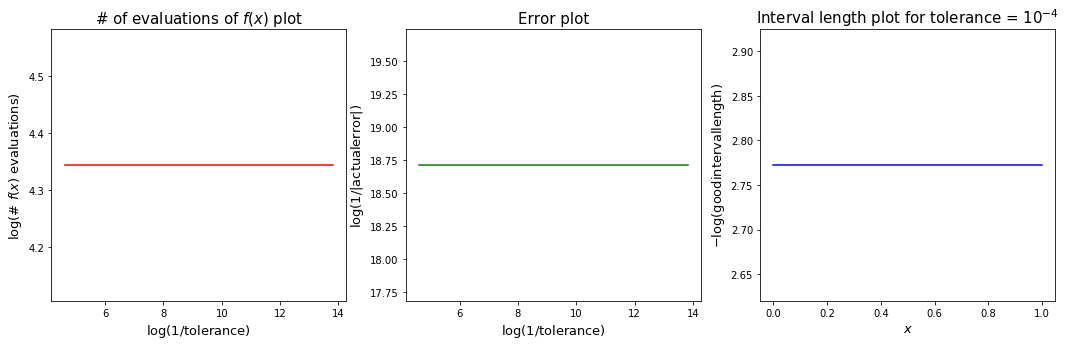

In [3]:
f1 = lambda x: x**4
make_plots(f1, 0, 1)

### Case $f(x) = \sqrt{\sin(\pi \cdot x)}$ for $x \in \left[0, \frac{1}{2}\right]$

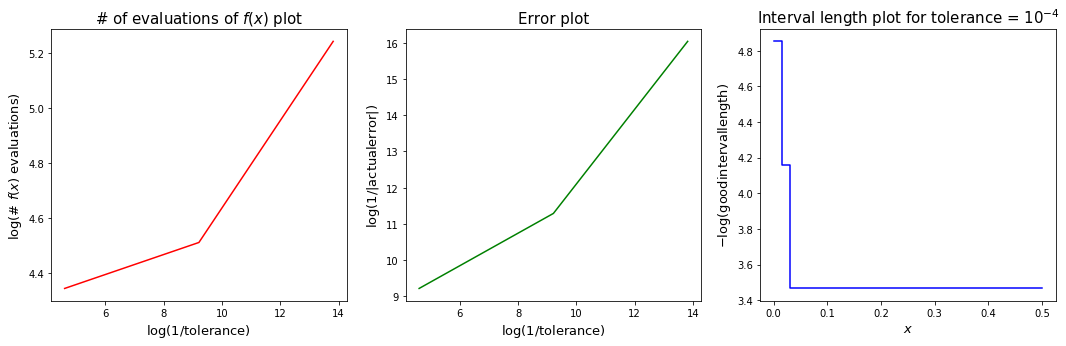

In [4]:
f2 = lambda x: sqrt(sin( pi * x))
make_plots(f2, 0, 1/2)

### Case $f(x) = x^6$ for $x \in [-1,1]$

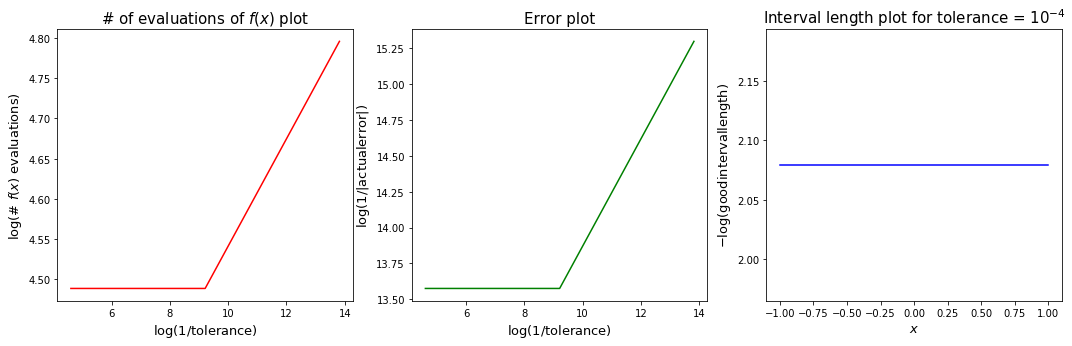

In [5]:
f3 = lambda x: x**6
make_plots(f3, -1, 1)

### Case $f(x) = \begin{cases} 1 & \text{ if } x < \frac{1}{\sqrt{2}} \\ 0 & \text{ if } x \ge \frac{1}{\sqrt{2}} \end{cases}$ for $x \in [0,1]$

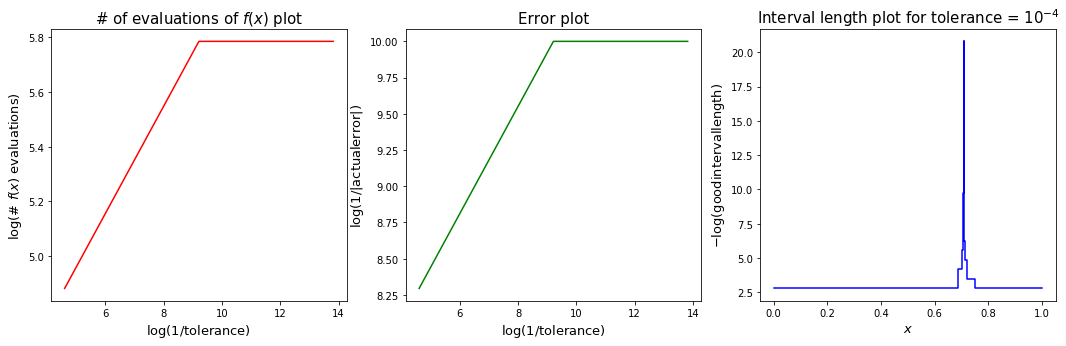

In [6]:
f4 = lambda x: 1 if x < 1 / sqrt(2.) else 0
make_plots(f4, 0, 1)
# Note that i chose the value of 10 for the tolerances 1e-4 and 1e-6 in the error plot
# (i chose something higher than the value for 1e-2), 
# since the value was too close to the true value and that was creating error of the type division by 0